Imports

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Data loading

In [10]:
dataset = 'IF' #IF, CP
analysis = 'HC' #HC, deep

df = pd.read_feather(f'Data/df_umap_{dataset}_{analysis}.fth')

print('Used experimental batches:')
print(df['Plate'].unique())
print('Used experimental treatments:')
print(print(df['Treatment'].unique()))

Used experimental batches:
['MIG-Exp03-ASC CD45 NFkB-40X' 'MIG-Exp05-ASC CD45 NFkB-40X'
 'MIG-Exp06-ASC CD45 NFkB-40X']
Used experimental treatments:
['Unprimed/Unactivated' 'LPS/Unactivated' 'Unprimed/Nigericin'
 'LPS/Nigericin']
None


Data wrangling

In [11]:
# Change plate names
if dataset == 'IF':
    df['Batch'] = df['Plate'].replace({
        'MIG-Exp03-ASC CD45 NFkB-40X': 'Batch 1',
        'MIG-Exp05-ASC CD45 NFkB-40X': 'Batch 2',
        'MIG-Exp06-ASC CD45 NFkB-40X': 'Batch 3'
        })
if dataset == 'CP':
    df['Batch'] = df['Plate'].replace({
        'MIG-Exp03-CP-40X-bin1X1': 'Batch 1',
        'MIG-Exp05-CP-40X-bin1X1': 'Batch 2',
        'MIG-Exp06-CP-40X-bin1X1': 'Batch 3'
        })

# Change treatment names
df['Treatment'] = df['Treatment'].replace({
    'Unprimed/Unactivated': 'Untreated',
    'LPS/Unactivated': 'LPS',
    'Unprimed/Nigericin': 'Nigericin',
    'LPS/Nigericin': 'LPS/Nigericin'
    })

Plot settings

In [12]:
data = df.sample(frac=0.2)
x = 'emb1'
y = 'emb2'

# Set colors
# Define a dictionary that maps categories to colors
color_dict = {'Untreated': 'gray', 'LPS': 'orange', 'Nigericin': 'red', 'LPS/Nigericin': 'purple'}

# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

Plotting batches

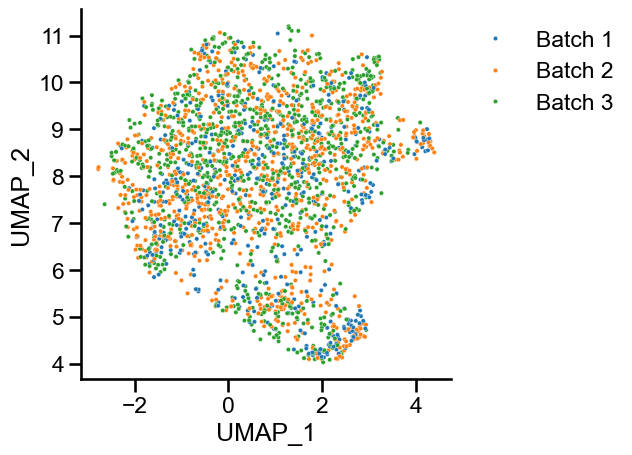

In [13]:
# Create a scatter plot
ax = sns.scatterplot(x=x, y=y, hue='Batch', hue_order=['Batch 1', 'Batch 2', 'Batch 3'], data=data, s=10, alpha=1)
ax.set_box_aspect(1)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# Plot refinement
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

# Saving plot
plt.savefig(dataset + '_' + analysis + '_UMAP_Batch.pdf', bbox_inches='tight')
plt.savefig(dataset + '_' + analysis + '_UMAP_Batch.png', bbox_inches='tight')

# Show the plot
plt.show()

Plotting treatments

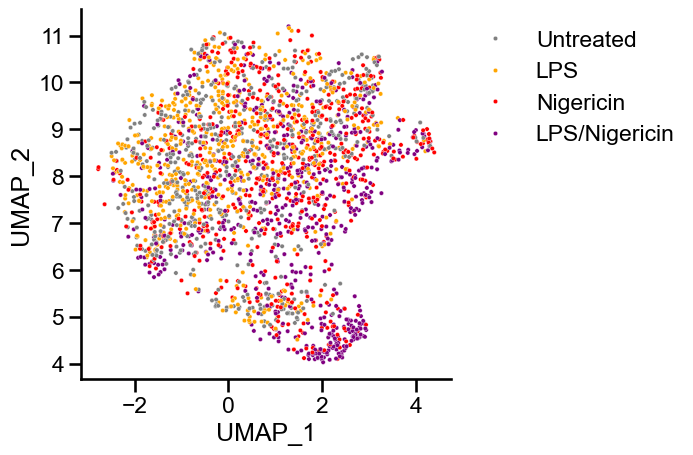

In [14]:
# Create a scatter plot
ax = sns.scatterplot(x=x, y=y, hue='Treatment', hue_order = ['Untreated', 'LPS', 'Nigericin', 'LPS/Nigericin'], data=data, s=10, alpha=1, palette=color_dict)
ax.set_box_aspect(1)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# Plot refinement
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

# Saving plot
plt.savefig(dataset + '_' + analysis + '_UMAP_Treatment.pdf', bbox_inches='tight')
plt.savefig(dataset + '_' + analysis + '_UMAP_Treatment.png', bbox_inches='tight')

# Show the plot
plt.show()

Facetgrid plot of all treatment conditions separately

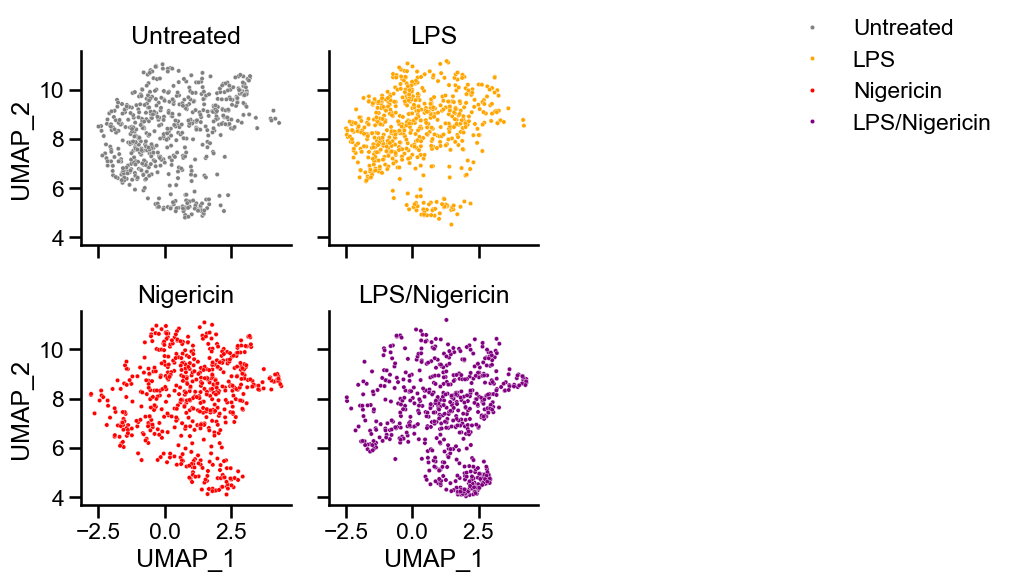

In [15]:
# Create a FacetGrid with one row and multiple columns
g = sns.FacetGrid(data, col='Treatment', col_wrap=2, col_order=['Untreated', 'LPS', 'Nigericin', 'LPS/Nigericin'], sharex=True, sharey=True)

# Map the scatter plot to each subplot
g.map_dataframe(sns.scatterplot, x=x, y=y, hue='Treatment', palette=color_dict, s=10, alpha=1)

# Move the legend to the top right corner
g.add_legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Add category title to each subplot
for item, ax in g.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)

# Set axis labels
g.set_axis_labels('UMAP_1', 'UMAP_2')

# Remove the spines
sns.despine()

# Saving plot
#plt.savefig(dataset + '_' + analysis + '_UMAP_TreatmentIndividual.pdf', bbox_inches='tight')
#plt.savefig(dataset + '_' + analysis + '_UMAP_TreatmentIndividual.png', bbox_inches='tight')

# Show the plot
plt.show()


Key feature overlay

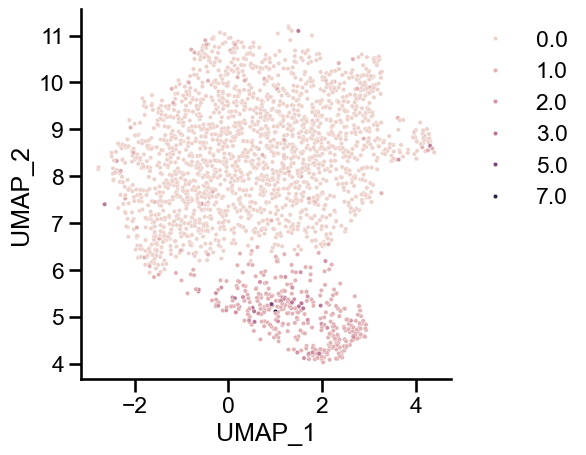

In [16]:
# Feature to overlay
hue = 'number_ASC' # area_ASC, avg_intensity_ASC, number_ASC

# Create a scatter plot
ax = sns.scatterplot(x=x, y=y, hue=hue, data=data, s=10, alpha=1)
ax.set_box_aspect(1)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# Plot refinement
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

# Saving plot
plt.savefig(dataset + '_' + analysis + '_UMAP_' + hue + '.pdf', bbox_inches='tight')
plt.savefig(dataset + '_' + analysis + '_UMAP_' + hue + '.png', bbox_inches='tight')

# Show the plot
plt.show()